# Countries K-Means Clustering

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
import chart_studio.plotly as cs
import plotly.graph_objs as pgo
import glob
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
import linearmodels.iv.model as lm
from sklearn.decomposition import PCA
import plotly.io as pio

In [280]:
df = pd.read_csv('../project_data/pm2_5.csv')

In [281]:
df.head()

,continent,continent_iso,code,country,year,pm2_5,gdp_per_capita,access_to_e_per,urban_pop
0,Africa,AF,ZWE,Zimbabwe,2010,23.231479,937.840338,38.782551,4262290
1,Africa,AF,ZWE,Zimbabwe,2011,23.074213,1082.615774,36.900002,4300463
2,Africa,AF,ZWE,Zimbabwe,2012,23.198097,1290.193956,44.000000,4355539
3,Africa,AF,ZWE,Zimbabwe,2013,23.111088,1408.367810,40.498375,4426387
4,Africa,AF,ZWE,Zimbabwe,2014,22.805950,1407.034293,32.299999,4503674


In [282]:
# cluster countries according to latest year of the dataset 2017

In [283]:
df_1 = df[df['year'] == 2017]

In [284]:
df_1 = df_1[['continent','country','pm2_5', 'gdp_per_capita', 'access_to_e_per', 'urban_pop']]

In [285]:
df_1

,continent,country,pm2_5,gdp_per_capita,access_to_e_per,urban_pop
7,Africa,Zimbabwe,22.251671,1192.107012,44.178635,4755312
15,Africa,Zambia,27.438035,1495.752138,40.299999,7434012
23,Asia,"Yemen, Rep.",50.456007,893.716573,79.199997,10817186
31,Asia,West Bank and Gaza,33.225630,3620.360487,99.699997,3380930
39,North America,Virgin Islands (U.S.),10.265312,35365.069300,100.000000,102564
...,...,...,...,...,...,...
1471,Africa,Angola,32.388505,2283.214233,43.013260,19586972
1479,Europe,Andorra,10.307621,40632.484390,100.000000,65087
1487,Africa,Algeria,38.884011,4134.936720,99.635490,29639704
1495,Europe,Albania,18.200603,4531.019374,99.889999,1706345


C:\Users\tomah\AppData\Local\Temp\ipykernel_328\4186062700.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

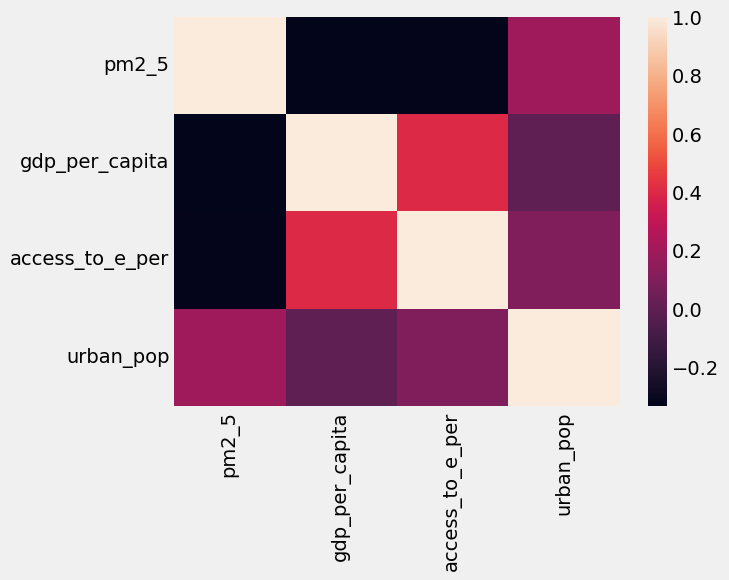

In [286]:
sns.heatmap(data = df_1.corr())

In [287]:
# we can observe that high correlation does not exist among the variables 

## Data preparation for K-Means Clustering

In [288]:
# log transformation of the variables cause they are highly skewed

In [289]:
df_2 = df_1

In [290]:
df_2['pm2_5'] = np.log(df_2['pm2_5'])

In [291]:
df_2['urban_pop'] = np.log(df_2['urban_pop'])

In [292]:
df_2['access_to_e_per'] = np.log(df_2['access_to_e_per'])

In [293]:
df_2['gdp_per_capita'] = np.log(df_2['gdp_per_capita'])

In [294]:
df_2

,continent,country,pm2_5,gdp_per_capita,access_to_e_per,urban_pop
7,Africa,Zimbabwe,3.102417,7.083478,3.788241,15.374773
15,Africa,Zambia,3.311930,7.310384,3.696351,15.821576
23,Asia,"Yemen, Rep.",3.921102,6.795389,4.371976,16.196647
31,Asia,West Bank and Gaza,3.503322,8.194329,4.602166,15.033661
39,North America,Virgin Islands (U.S.),2.328770,10.473480,4.605170,11.538242
...,...,...,...,...,...,...
1471,Africa,Angola,3.477804,7.733339,3.761508,16.790375
1479,Europe,Andorra,2.332884,10.612323,4.605170,11.083480
1487,Africa,Algeria,3.660583,8.327227,4.601518,17.204625
1495,Europe,Albania,2.901455,8.418702,4.604070,14.349864


In [295]:
# data scaling 

In [296]:
scaler = StandardScaler()

In [297]:
scaler.fit(df_2[['pm2_5', 'gdp_per_capita', 'access_to_e_per', 'urban_pop']])

StandardScaler()

In [298]:
df_2[['pm2_5', 'gdp_per_capita', 'access_to_e_per', 'urban_pop']] = scaler.transform(df_2[[
    'pm2_5', 'gdp_per_capita', 'access_to_e_per', 'urban_pop']])

In [299]:
df_2

,continent,country,pm2_5,gdp_per_capita,access_to_e_per,urban_pop
7,Africa,Zimbabwe,0.028016,-1.142654,-1.162760,0.153467
15,Africa,Zambia,0.354550,-0.982604,-1.352576,0.362785
23,Asia,"Yemen, Rep.",1.303968,-1.345859,0.043054,0.538498
31,Asia,West Bank and Gaza,0.652841,-0.359111,0.518553,-0.006337
39,North America,Virgin Islands (U.S.),-1.177744,1.248497,0.524760,-1.643869
...,...,...,...,...,...,...
1471,Africa,Angola,0.613070,-0.684272,-1.217982,0.816647
1479,Europe,Andorra,-1.171333,1.346430,0.524760,-1.856916
1487,Africa,Algeria,0.897940,-0.265371,0.517216,1.010715
1495,Europe,Albania,-0.285192,-0.200848,0.522486,-0.326682


In [300]:
df_3 = df_2[['pm2_5', 'gdp_per_capita', 'access_to_e_per', 'urban_pop']]

In [301]:
df_3['urban_pop'] = df_3['urban_pop']/1000000

C:\Users\tomah\AppData\Local\Temp\ipykernel_328\1974394952.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## K-Means Clustering

### Silhouette Method-Elbow Method metrics

In [302]:
df_clustering = df_3[['pm2_5','gdp_per_capita','urban_pop']]

In [303]:
wcss = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_clustering)
    wcss.append(kmeanModel.inertia_)

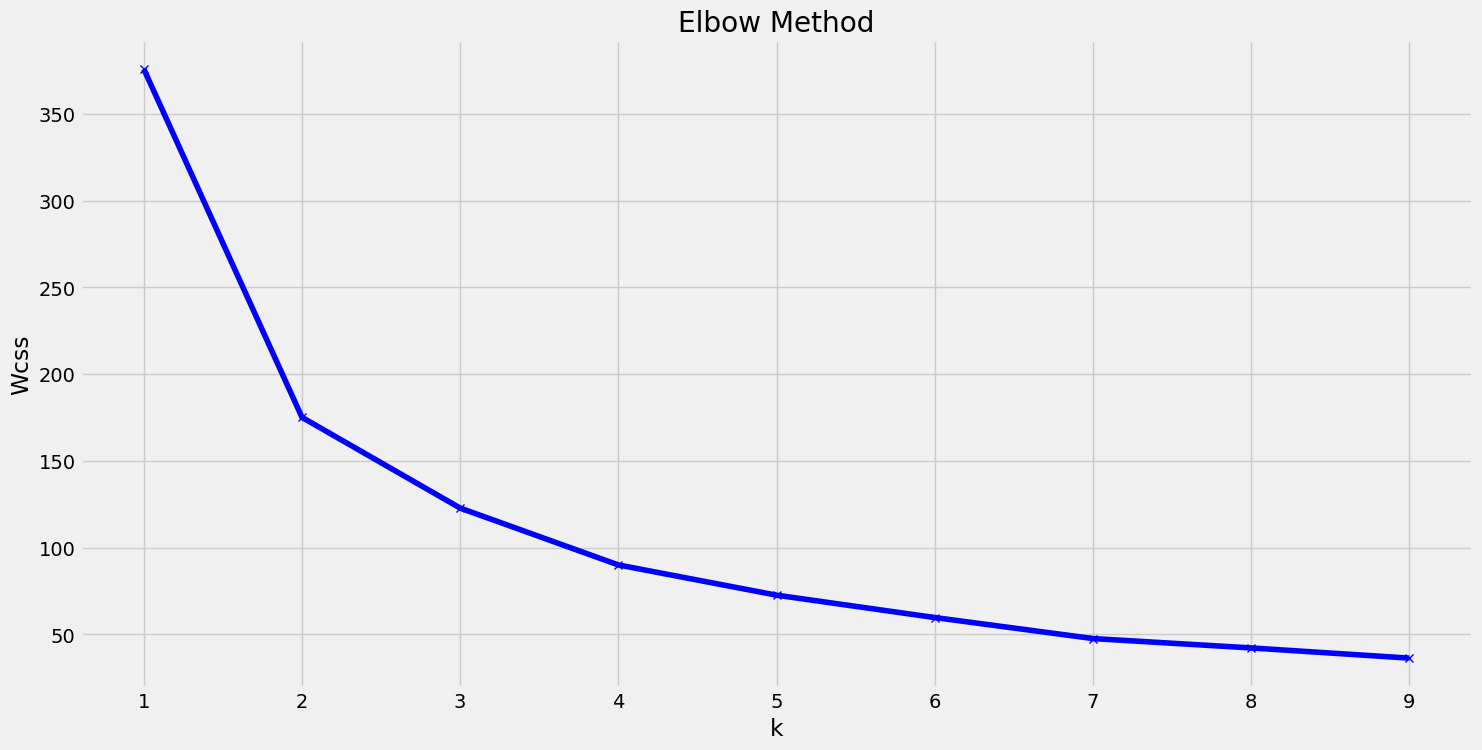

In [304]:
plt.figure(figsize=(16,8))
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('Wcss')
plt.title('Elbow Method')
plt.show()

In [305]:
silhouette_coefficients = []
for k in range (2,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state=42 )
    kmeans.fit(df_clustering)
    score = silhouette_score(df_clustering, kmeans.labels_)
    silhouette_coefficients.append(score)

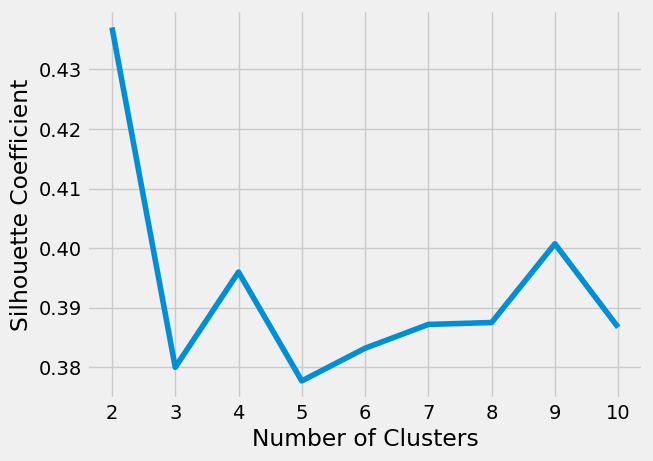

In [306]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [307]:
k_means = KMeans(n_clusters=3, random_state=42, init='k-means++')

In [308]:
fit = k_means.fit(df_clustering)

In [309]:
pred = fit.predict(df_clustering)

In [310]:
pred

array([2, 2, 2, 2, 1, 2, 0, 2, 1, 1, 1, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0,
       2, 2, 2, 1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 2, 2, 2,
       0, 2, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 2, 2, 0, 1,
       1, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 1, 2, 1, 0, 2, 2, 1, 1,
       2, 2, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 2, 1, 0, 1, 1, 1, 2, 2, 0, 2,
       1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 0, 2, 0,
       1, 2, 0, 2, 0, 0, 0, 2, 1, 1, 1, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2,
       2, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 1, 0, 0, 2, 2,
       1, 0, 1, 1, 2, 1, 0, 2, 1, 2, 0, 2])

In [311]:
df_1['cluster'] = pred

In [312]:
df_5 = df[df['year'] == 2017]

In [313]:
df_5['clusters'] = pred

C:\Users\tomah\AppData\Local\Temp\ipykernel_328\294330953.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [314]:
df_5

,continent,continent_iso,code,country,year,pm2_5,gdp_per_capita,access_to_e_per,urban_pop,clusters
7,Africa,AF,ZWE,Zimbabwe,2017,22.251671,1192.107012,44.178635,4755312,2
15,Africa,AF,ZMB,Zambia,2017,27.438035,1495.752138,40.299999,7434012,2
23,Asia,AS,YEM,"Yemen, Rep.",2017,50.456007,893.716573,79.199997,10817186,2
31,Asia,AS,PSE,West Bank and Gaza,2017,33.225630,3620.360487,99.699997,3380930,2
39,North America,NaN,VIR,Virgin Islands (U.S.),2017,10.265312,35365.069300,100.000000,102564,1
...,...,...,...,...,...,...,...,...,...,...
1471,Africa,AF,AGO,Angola,2017,32.388505,2283.214233,43.013260,19586972,2
1479,Europe,EU,AND,Andorra,2017,10.307621,40632.484390,100.000000,65087,1
1487,Africa,AF,DZA,Algeria,2017,38.884011,4134.936720,99.635490,29639704,2
1495,Europe,EU,ALB,Albania,2017,18.200603,4531.019374,99.889999,1706345,0


In [315]:
df_5['urban_pop'] = df_5['urban_pop']/1000000

C:\Users\tomah\AppData\Local\Temp\ipykernel_328\4032250293.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [316]:
fig = go.Figure()

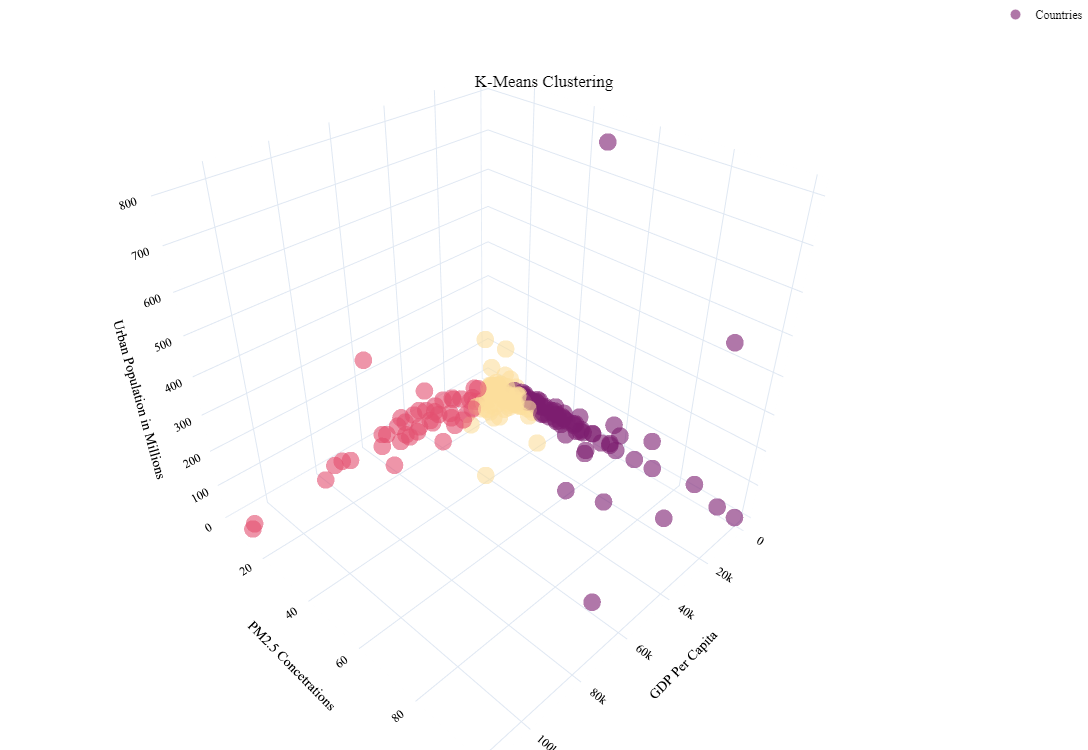

In [317]:
fig.add_trace(go.Scatter3d(x = df_5['gdp_per_capita'], y = df_5['pm2_5'], z = df_5['urban_pop'],
                      mode = 'markers',
                           marker = dict(
                           size = 10,
                           color = df_5['pm2_5'],
                           colorscale = 'sunsetdark'),
                           opacity = 0.6,
                           
                       name = 'Countries',
                        marker_color=df_5['clusters'],
                                text=df_5['country'],))
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.update_layout(width = 1000, 
                 height = 1000)
fig.update_scenes(xaxis_title_text = 'GDP Per Capita', 
                  yaxis_title_text = 'PM2.5 Concetrations',
                  zaxis_title_text = 'Urban Population in Millions',
                  )
fig.update_layout(title='K-Means Clustering', title_x = 0.5, title_y = 0.9,
                  font = dict(family = "Gilroy", color  = 'black', size = 12),
                  template = 'plotly_white',
                  width=750, height=750,
                  autosize = True,
                  showlegend = True,
                  margin=dict(l=0, r=0, b=0, t=0))

### Average values of each cluster 

In [319]:
cluster_pm2_5 = pd.DataFrame(df_5.groupby(['clusters']).pm2_5.mean())
cluster_gdppp = pd.DataFrame(df_5.groupby(['clusters']).gdp_per_capita.mean())
cluster_urban_pop = pd.DataFrame(df_5.groupby(['clusters']).urban_pop.mean())
cluster_access_to_e = pd.DataFrame(df_5.groupby(['clusters']).access_to_e_per.mean())

In [320]:
df_summary = pd.concat([cluster_pm2_5,cluster_gdppp, cluster_access_to_e, cluster_urban_pop], axis =1)

In [322]:
df_summary.columns = ['pm2_5', 'gdp_per_capita', 'access_to_e_per', 'urban_pop']

In [323]:
df_summary

,pm2_5,gdp_per_capita,access_to_e_per,urban_pop
clusters,,,,
0,19.399017,8248.614497,93.315701,14.088601
1,11.029203,42358.254796,99.847727,19.104068
2,44.585793,4033.886413,65.430385,30.962065


In [324]:
# We can observe a low income cluster a high income cluster and a middle income cluster